In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipympl
import imageio.v3 as iio
import skimage.color
import skimage.filters
import skimage.measure

In [ ]:
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.6 MB/s eta 0:00:00


In [ ]:
def connected_components(filename, sigma=1.0, t=0.5, connectivity=2):
    # load the image
    image = iio.imread(filename)
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(image)
    # denoise the image with a Gaussian filter
    blurred_image = skimage.filters.gaussian(gray_image, sigma=sigma)
    # mask the image according to threshold
    binary_mask = blurred_image < t
    # perform connected component analysis
    labeled_image, count = skimage.measure.label(binary_mask,
                                                 connectivity=connectivity, return_num=True)
    return labeled_image, count

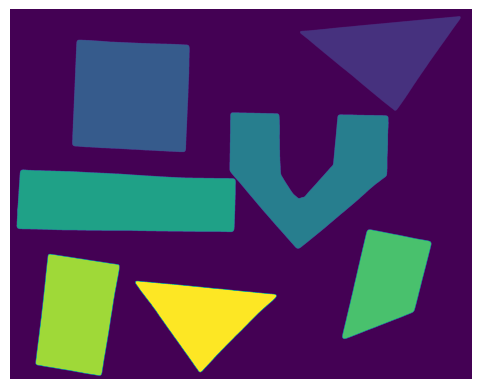

In [ ]:
labeled_image, count = connected_components(filename="shapes-01.jpg", sigma=7.0, t=0.9, connectivity=2)
fig, ax = plt.subplots()
plt.imshow(labeled_image)
plt.axis("off");
plt.show()

In [ ]:
count

7

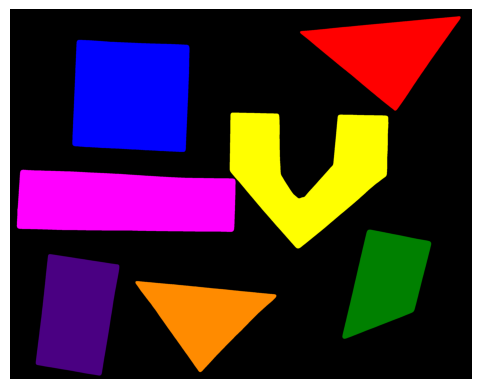

In [ ]:
# convert the label image to color image
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
fig, ax = plt.subplots()
plt.imshow(colored_label_image)
plt.axis("off");


In [ ]:
print("Found", count, "objects in the image.")
#or
num_objects = np.max(labeled_image)
print("Found", num_objects, "objects in the image.")


Found 7 objects in the image.
Found 7 objects in the image.
